
# **TEAM NO 2** 

THRUPTHI N: PES1UG20CS470

TANISHKA GARG: PES1UG20CS459

VANKADARA NEHA: PES1UG20CS483

NAYAN JAIN: PES1UG20CS262


# **1.&nbsp;Implementation (6 marks)**

##**a). Make a list of characters in the novel. You need to decide whom to include. For example, for Mahabharata, there is no point in including a character representing a random soldier**

In [ ]:
import nltk
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
with open("alice_in_wonderland.txt", "r") as f:
    data = f.read()

    # Extracting co-occurrences of characters
characters = [
'Alice',
'White Rabbit',
'Mouse',
'Dodo',
'Lory',
'Eaglet',
'Duck',
'Caterpillar',
'Duchess',
'Cheshire Cat',
'Hatter',
'March Hare',
'Dormouse',
'Queen of Hearts',
'Knave of Hearts',
'Gryphon',
'Mock Turtle'
]

# replacing different words with the common name
data = data.replace('rabbit', 'White Rabbit')
data = data.replace('cat', 'Cheshire Cat')
data = data.replace('hare', 'March Hare')
data = data.replace('queen', 'Queen of Hearts')
data = data.replace('turtle', 'Mock Turtle')
data = data.replace('Jack of Hearts', 'Knave of Hearts')

#tokenizing
sentences = sent_tokenize(data)

##**b). Extract a social graph of the manually identified characters in the text ( as shown in the hands-on session). To do this, you need to use a co-occurrence algorithm as discussed and shown in the demo in class. Also, plot the graph using networkx**

In [ ]:
char_df = pd.DataFrame(0, index=characters, columns=characters)
char_df.head()

,Alice,White Rabbit,Mouse,Dodo,Lory,Eaglet,Duck,Caterpillar,Duchess,Cheshire Cat,Hatter,March Hare,Dormouse,Queen of Hearts,Knave of Hearts,Gryphon,Mock Turtle
Alice,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
White Rabbit,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Mouse,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Dodo,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Lory,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
for sentence in sentences:
    for char1 in characters:
        for char2 in characters:
            if (char1 != char2) and char1 in sentence and char2 in sentence:
                char_df[char1][char2] += 1
                char_df[char2][char1] += 1

print(char_df)

                 Alice  White Rabbit  Mouse  Dodo  Lory  Eaglet  Duck  \
Alice                0            20     12     4     2       0     0   
White Rabbit        20             0      2     0     0       0     0   
Mouse               12             2      0     0     0       0     0   
Dodo                 4             0      0     0     2       2     2   
Lory                 2             0      0     2     0       2     2   
Eaglet               0             0      0     2     2       0     2   
Duck                 0             0      0     2     2       2     0   
Caterpillar          6             0      0     0     0       0     0   
Duchess             18             4      2     0     0       0     0   
Cheshire Cat        24             0      2     0     0       0     0   
Hatter              10             0      0     0     0       0     0   
March Hare          12             2      2     0     0       0     0   
Dormouse            16             0      0     0  

In [ ]:
G = nx.Graph()
G = nx.from_pandas_adjacency(char_df)

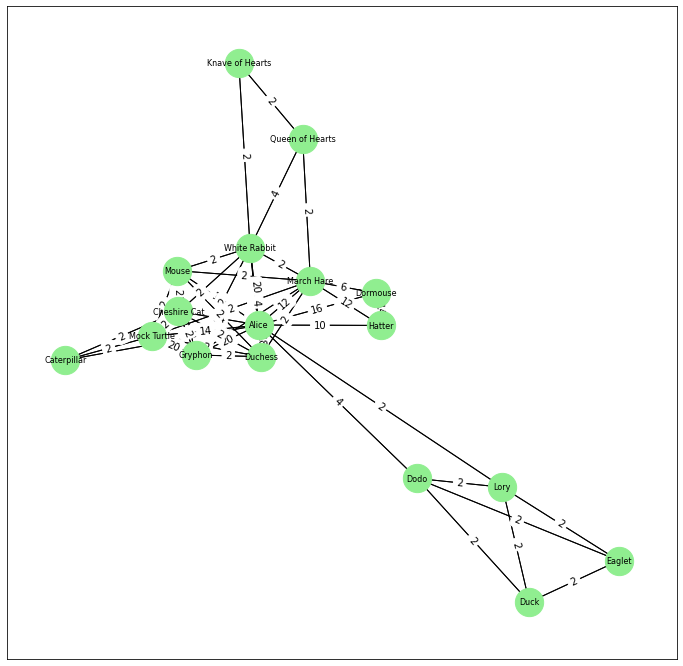

In [ ]:
plt.figure(3, figsize=(12,12))
pos = nx.fruchterman_reingold_layout(G)

nx.draw_networkx(G, pos=pos, node_size = 800, font_size=8, node_color="lightgreen")
nx.draw_networkx_edges(G, pos=pos)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)
plt.show()

In [ ]:
# number of edges
print(G.number_of_edges())

46


##**c). Calculate the four types of centrality of main protagonists i.e. degree,betweenness, closeness, PageRank .**

In [ ]:
# Degree centrality
degree_centrality = nx.degree_centrality(G)
print("degree centrality:")
for char in sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:5]:
    print(char, degree_centrality[char])
print()

# Betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)
print("betweeness centrality:")
for char in sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True)[:5]:
    print(char, betweenness_centrality[char])
print()

# Closeness centrality
print("closeness centrality:")
closeness_centrality = nx.closeness_centrality(G)
for char in sorted(closeness_centrality, key=closeness_centrality.get, reverse=True)[:5]:
    print(char, closeness_centrality[char])
print()

# PageRank
print("pagerank:")
pagerank = nx.pagerank(G)
for char in sorted(pagerank, key=pagerank.get, reverse=True)[:5]:
    print(char, pagerank[char])


degree centrality:
Alice 0.75
March Hare 0.5625
White Rabbit 0.5
Mock Turtle 0.5
Mouse 0.4375

betweeness centrality:
Alice 0.5122222222222221
White Rabbit 0.15277777777777776
March Hare 0.11527777777777777
Dodo 0.10833333333333334
Lory 0.10833333333333334

closeness centrality:
Alice 0.8
March Hare 0.64
White Rabbit 0.6153846153846154
Mock Turtle 0.6153846153846154
Mouse 0.5925925925925926

pagerank:
Alice 0.2442752213000634
Gryphon 0.07568633741623594
Mock Turtle 0.07103656542554486
White Rabbit 0.06958744038683669
March Hare 0.06831874975371773


##**d). Calculate the global clustering coefficient of your graph and local clustering coefficient of the main protagonist nodes.**

In [ ]:
#global clustering coefficient
print(nx.average_clustering(G))

0.8104702487055429


In [ ]:
# local clustering coefficient
# Compute the local clustering coefficient of each node
local_clustering = nx.clustering(G)

# Print the local clustering coefficient of each node
for node, coefficient in local_clustering.items():
    print(f"{node}: {coefficient}")

Alice: 0.3787878787878788
White Rabbit: 0.6071428571428571
Mouse: 0.9047619047619048
Dodo: 0.6666666666666666
Lory: 0.6666666666666666
Eaglet: 1.0
Duck: 1.0
Caterpillar: 1.0
Duchess: 0.9047619047619048
Cheshire Cat: 0.8
Hatter: 1.0
March Hare: 0.5277777777777778
Dormouse: 1.0
Queen of Hearts: 0.6666666666666666
Knave of Hearts: 1.0
Gryphon: 0.9047619047619048
Mock Turtle: 0.75


##**e). Detect communities**

###**i). K - clique (percolation method)**

In [ ]:
# using k-clique percolation method
from networkx.algorithms.community import k_clique_communities  # find k-clique community using percolation method
c = list(k_clique_communities(G, 4))
print(c)

[frozenset({'Eaglet', 'Lory', 'Dodo', 'Duck'}), frozenset({'Gryphon', 'Mock Turtle', 'Mouse', 'Duchess', 'Cheshire Cat', 'March Hare', 'White Rabbit', 'Alice', 'Caterpillar'}), frozenset({'Hatter', 'Alice', 'March Hare', 'Dormouse'})]


In [ ]:
for i in c:
  print(i)


frozenset({'Eaglet', 'Lory', 'Dodo', 'Duck'})
frozenset({'Gryphon', 'Mock Turtle', 'Mouse', 'Duchess', 'Cheshire Cat', 'March Hare', 'White Rabbit', 'Alice', 'Caterpillar'})
frozenset({'Hatter', 'Alice', 'March Hare', 'Dormouse'})


###**ii). Louvain community detection**

[{'Duck', 'Lory', 'Dodo', 'Eaglet'}, {'Gryphon', 'Mock Turtle', 'Mouse', 'Duchess', 'Cheshire Cat', 'White Rabbit', 'Alice', 'Caterpillar'}, {'Dormouse', 'March Hare', 'Hatter'}, {'Knave of Hearts', 'Queen of Hearts'}]


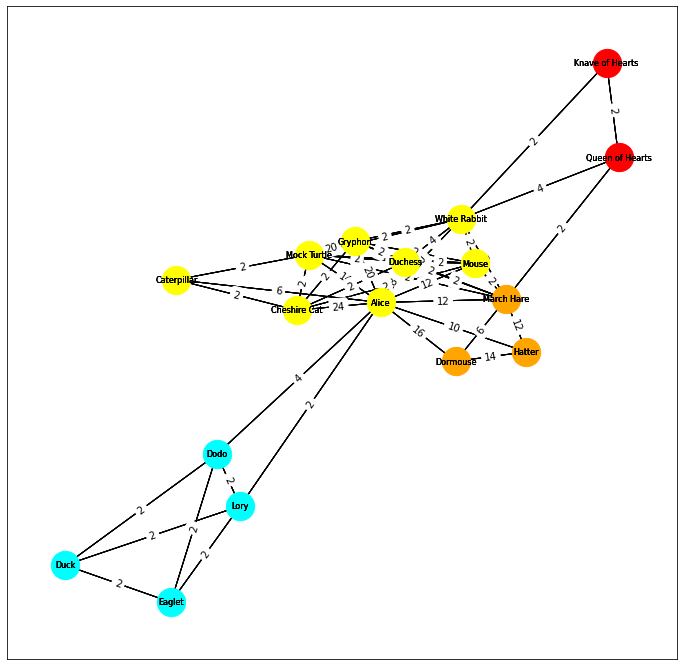

In [ ]:
# using lovain method
from networkx.algorithms import community
communities_lovain=community.louvain_communities(G)
print(communities_lovain)

plt.figure(3, figsize=(12,12))
pos = nx.fruchterman_reingold_layout(G)

nx.draw_networkx(G, pos=pos,node_size = 800,font_size=8,node_color="cyan", nodelist=list(communities_lovain[0]))
nx.draw_networkx(G, pos=pos,node_size = 800,font_size=8,node_color="yellow", nodelist=list(communities_lovain[1]))
nx.draw_networkx(G, pos=pos,node_size = 800,font_size=8,node_color="orange", nodelist=list(communities_lovain[2]))
nx.draw_networkx(G, pos=pos,node_size = 800,font_size=8,node_color="red", nodelist=list(communities_lovain[3]))
nx.draw_networkx_edges(G, pos=pos)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)
plt.show()

###**iii). Girvann Newman**

In [ ]:
# girvan newman

from networkx.algorithms.community.centrality import girvan_newman
communities = list(girvan_newman(G))
print(f"Number of communities: {len(communities)}")
for i, community in enumerate(communities):
    print(f"Community {i+1}: {sorted(community)}")

Number of communities: 16
Community 1: [{'Gryphon', 'Mock Turtle', 'Mouse', 'Duchess', 'Hatter', 'Cheshire Cat', 'Dormouse', 'March Hare', 'White Rabbit', 'Queen of Hearts', 'Knave of Hearts', 'Alice', 'Caterpillar'}, {'Eaglet', 'Lory', 'Dodo', 'Duck'}]
Community 2: [{'Gryphon', 'Mock Turtle', 'Mouse', 'Duchess', 'Hatter', 'Cheshire Cat', 'Dormouse', 'March Hare', 'White Rabbit', 'Alice', 'Caterpillar'}, {'Eaglet', 'Lory', 'Dodo', 'Duck'}, {'Knave of Hearts', 'Queen of Hearts'}]
Community 3: [{'Gryphon', 'Mock Turtle', 'Mouse', 'Duchess', 'Cheshire Cat', 'March Hare', 'White Rabbit', 'Alice', 'Caterpillar'}, {'Eaglet', 'Lory', 'Dodo', 'Duck'}, {'Hatter', 'Dormouse'}, {'Knave of Hearts', 'Queen of Hearts'}]
Community 4: [{'Gryphon', 'Mock Turtle', 'Mouse', 'Duchess', 'Cheshire Cat', 'March Hare', 'White Rabbit', 'Alice'}, {'Eaglet', 'Lory', 'Dodo', 'Duck'}, {'Caterpillar'}, {'Hatter', 'Dormouse'}, {'Knave of Hearts', 'Queen of Hearts'}]
Community 5: [{'Gryphon', 'Mock Turtle', 'Mouse', 

##**f). Find the degree distribution, average shortest path, and size of the largest component. Also create equivalent generative models to compare against the social graph that you extracted.**

In [ ]:
# degree distribution

N,K = G.order(), G.size()
avg_deg = float(K)/N
print ("Nodes: ", N)
print ("Edges: ", K)
print ("Average degree: ", avg_deg)

Nodes:  17
Edges:  46
Average degree:  2.7058823529411766


In [ ]:
# average shortest path
avg_short_path=nx.average_shortest_path_length(G)
print(avg_short_path)

1.9411764705882353


In [ ]:
largest_connected_component=[c for c in sorted(nx.connected_components(G), key=len, reverse=True)][0]
print(len(largest_connected_component)) #size of the largest component

17


###**i). G(n,p) and G(n,m) generated graph**

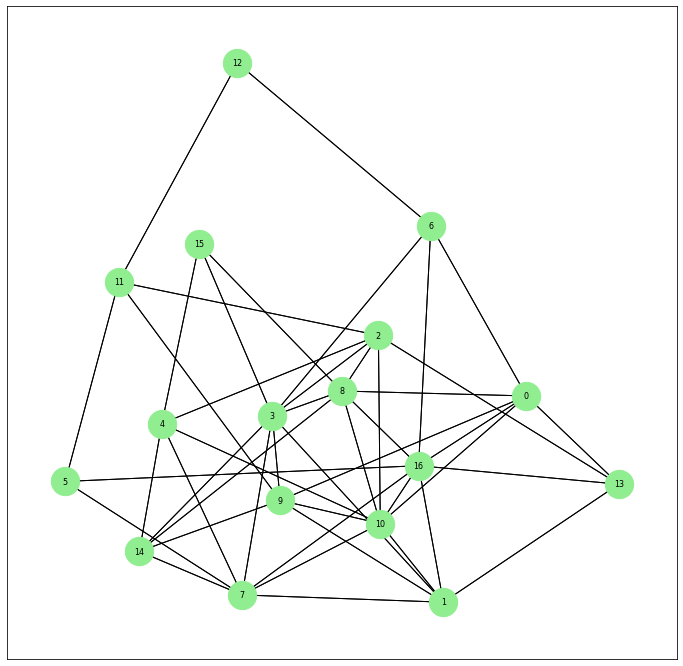

Average degree:  2.7058823529411766
Average shortest path:  1.7573529411764706


In [ ]:
#calculating probability of forming the edges p=(2*m)/n*(n-1)
p=(2*46)/(17*(16))
gnp_G=nx.fast_gnp_random_graph(17, p=p)
plt.figure(3, figsize=(12,12))
pos = nx.fruchterman_reingold_layout(gnp_G)

nx.draw_networkx(gnp_G, pos=pos, node_size = 800, font_size=8, node_color="lightgreen")
nx.draw_networkx_edges(gnp_G, pos=pos)
edge_labels = nx.get_edge_attributes(gnp_G, 'weight')
nx.draw_networkx_edge_labels(gnp_G, pos=pos, edge_labels=edge_labels)
plt.show()

## degree distribution
N,K = gnp_G.order(), gnp_G.size()
avg_deg = float(K)/N
print ("Average degree: ", avg_deg)

# average shortest path
avg_short_path=nx.average_shortest_path_length(gnp_G)
print("Average shortest path: ", avg_short_path)

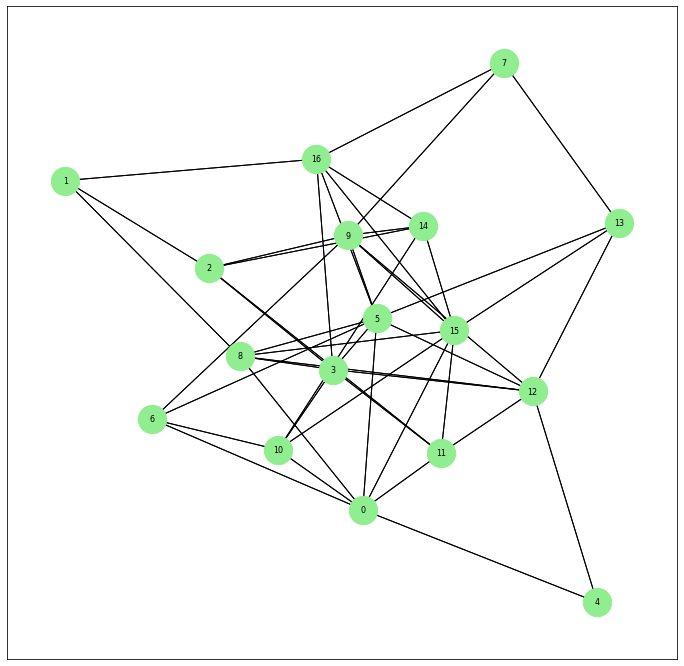

Average degree:  2.7058823529411766
Average shortest path:  1.7573529411764706


In [ ]:
gnm_G=nx.gnm_random_graph(17,46)
plt.figure(3, figsize=(12,12))
pos = nx.fruchterman_reingold_layout(gnm_G)

nx.draw_networkx(gnm_G, pos=pos, node_size = 800, font_size=8, node_color="lightgreen")
nx.draw_networkx_edges(gnm_G, pos=pos)
edge_labels = nx.get_edge_attributes(gnm_G, 'weight')
nx.draw_networkx_edge_labels(gnm_G, pos=pos, edge_labels=edge_labels)
plt.show()

## degree distribution
N,K = gnm_G.order(), gnm_G.size()
avg_deg = float(K)/N
print ("Average degree: ", avg_deg)

# average shortest path
avg_short_path=nx.average_shortest_path_length(gnm_G)
print("Average shortest path: ", avg_short_path)

###**ii). Preferential attachment**

In [ ]:
## preferential attachment method

preferential=nx.preferential_attachment(G)
for u, v, p in preferential:
    print(f"({u}, {v}) -> {p}")

(Gryphon, Duck) -> 21
(Gryphon, Hatter) -> 21
(Gryphon, Queen of Hearts) -> 21
(Gryphon, Dormouse) -> 21
(Gryphon, Knave of Hearts) -> 14
(Gryphon, Lory) -> 28
(Gryphon, Dodo) -> 28
(Gryphon, Eaglet) -> 21
(Gryphon, Caterpillar) -> 21
(Mock Turtle, Duck) -> 24
(Mock Turtle, Hatter) -> 24
(Mock Turtle, Queen of Hearts) -> 24
(Mock Turtle, Dormouse) -> 24
(Mock Turtle, Knave of Hearts) -> 16
(Mock Turtle, Lory) -> 32
(Mock Turtle, Dodo) -> 32
(Mock Turtle, Eaglet) -> 24
(Duck, Mouse) -> 21
(Duck, Duchess) -> 21
(Duck, Hatter) -> 9
(Duck, Cheshire Cat) -> 18
(Duck, Dormouse) -> 9
(Duck, March Hare) -> 27
(Duck, White Rabbit) -> 24
(Duck, Queen of Hearts) -> 9
(Duck, Knave of Hearts) -> 6
(Duck, Alice) -> 36
(Duck, Caterpillar) -> 9
(Mouse, Hatter) -> 21
(Mouse, Queen of Hearts) -> 21
(Mouse, Dormouse) -> 21
(Mouse, Knave of Hearts) -> 14
(Mouse, Lory) -> 28
(Mouse, Dodo) -> 28
(Mouse, Eaglet) -> 21
(Mouse, Caterpillar) -> 21
(Duchess, Hatter) -> 21
(Duchess, Queen of Hearts) -> 21
(Duches

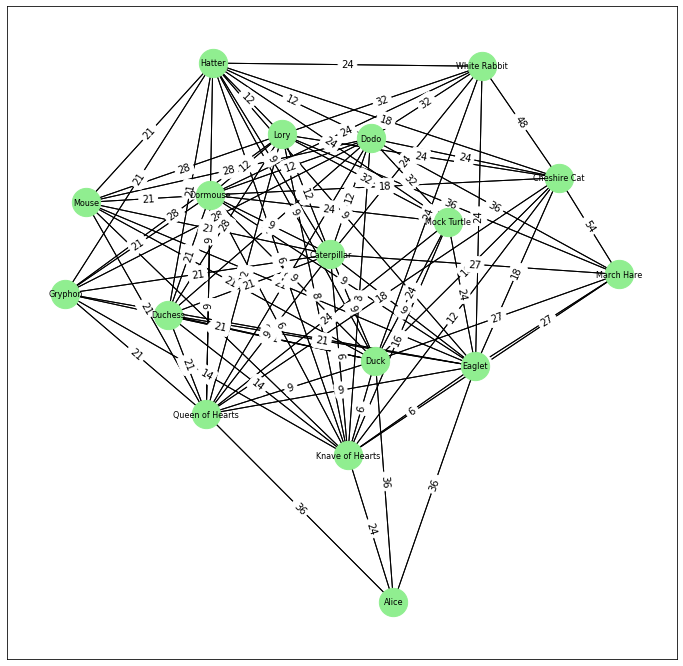

Average degree:  5.294117647058823
Average shortest path:  1.338235294117647


In [ ]:
preferential_df = pd.DataFrame(0, index=characters, columns=characters)
preferential=nx.preferential_attachment(G)
for u, v, p in preferential:
  preferential_df[u][v]=p
  preferential_df[v][u]=p
preferential_G= nx.Graph()
preferential_G = nx.from_pandas_adjacency(preferential_df)
plt.figure(3, figsize=(12,12))
pos = nx.fruchterman_reingold_layout(preferential_G)
nx.draw_networkx(preferential_G, pos=pos, node_size = 800, font_size=8, node_color="lightgreen")
nx.draw_networkx_edges(preferential_G, pos=pos)
preferential_edge_labels = nx.get_edge_attributes(preferential_G, 'weight')
nx.draw_networkx_edge_labels(preferential_G, pos=pos, edge_labels=preferential_edge_labels)
plt.show()

## degree distribution
N,K = preferential_G.order(), preferential_G.size()
avg_deg = float(K)/N
print ("Average degree: ", avg_deg)

# average shortest path
avg_short_path=nx.average_shortest_path_length(preferential_G)
print("Average shortest path: ", avg_short_path)



###**iii). Small-world model**

In [ ]:
# small world generative graph
small_world_G=nx.random_reference(G, niter=1, connectivity=True, seed=None)

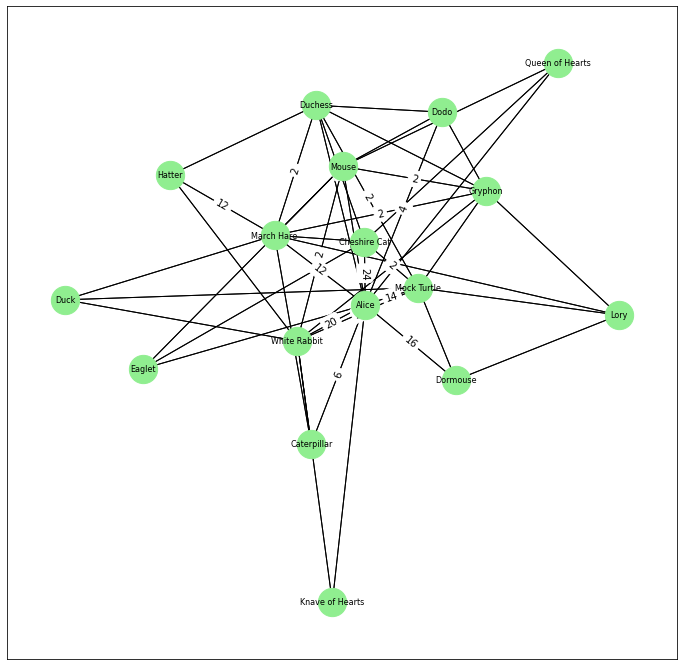

Average degree:  2.7058823529411766
Average shortest path:  1.7279411764705883


In [ ]:
plt.figure(3, figsize=(12,12))
pos = nx.fruchterman_reingold_layout(small_world_G)

nx.draw_networkx(small_world_G, pos=pos, node_size = 800, font_size=8, node_color="lightgreen")
nx.draw_networkx_edges(small_world_G, pos=pos)
edge_labels = nx.get_edge_attributes(small_world_G, 'weight')
nx.draw_networkx_edge_labels(small_world_G, pos=pos, edge_labels=edge_labels)
plt.show()

## degree distribution
N,K = small_world_G.order(), small_world_G.size()
avg_deg = float(K)/N
print ("Average degree: ", avg_deg)

# average shortest path
avg_short_path=nx.average_shortest_path_length(small_world_G)
print("Average shortest path: ", avg_short_path)

# **2. Analysis (4 marks) - While the implementation above should be fast if you reuse the sample code provided, spend quality time in this section as a team.**

## **a).Who are the protagonists as per your analysis? If the 4 centralities are not having high correlation, how do you interpret them?**
## Alice is the protagonist of the story. Alice has highest degree centrality,betweeness centrality,closeness centrality and pagerank. Having higher degree centrality shows that it has more connections with the characters.Higher betweeness centrality shows that Alice is influential node for other characters to connect.From above interpretations, it is clearly seen that Alice is the protagonist of this novel. Also from the centrality measures, we also get to know that March Hare is also influential node.

## **b).What do the clustering coefficients, discovered communities, extracted ego network of protagonists and average shortest path tell you about the dynamics in the story? How is clustering coefficient related to transitivity of nodes?**
## Clustering coefficients - Alice has low clustering coefficient(0.378) indicating that she has weak ties with the characters.
## discovered communities - {'Lory', 'Duck', 'Dodo', 'Eaglet'} are found in all community detection technique. They are all bird characters in this novel.Also,We can notice that March hare,hatter are in the same community, as March hare is often referred as the friend of Hatter in the novel.Moreover Knave of hearts and king of hearts, who are characters that are associated with the world of playing cards are also in the same community.{'Cheshire Cat','Alice','White Rabbit','Caterpillar'} who are creatures which Alice encounters in the wonderland are also grouped into the same community in the lovain graph.
## ego network- The centrality measures above indicate that Alice is very influential as it has higher degree centrality and betweeness centrality indicating that Alice is the most influential ego in the network.
## average shortest path- this is 1.94(around 2) indicating that characters can easily connect with each other within 2 edges.

## If the clustering coefficients are more it indicates that there are more connected triads, which in turn implies transitivity of node to form triads is also high. Also in the same way, if transitivity of nodes is more to form triads,more triads will be there in the network which implies that clustering coefficient of the network will be higher.


## **c).Compare all the generated graphs (from (f)) to the actual graph. Is there a difference, and if yes, what can it be attributed to? Also, analyze the differences between the 3 generated graph’s attributes.** 
## The degree distribution and average shortest path of the social graph and the graphs from the generative models are almost the same. This indicates the generative models used are almost same as the social graph that we have created in the begining.
## social graph:  
## degree distribution- 2.7
## average shortest path- 1.94

## generative model:
## 1) gnp model:
## degree distribution- 2.7
## average shortest path- 1.75

## 2) gnm model:
## degree distribution- 2.7
## average shortest path- 1.757

## 3) small world model:
## degree distribution- 2.7
## average shortest path- 1.727

## 4) preferential attachment:
## degree distribution- 5.29
## average shortest path- 1.338

## Thus the generative models(gnp,gnm,small world) are almost similar to the social graph that we have created but the preferential attachment graph is different from these. As preferential attachment connects the higher degree nodes with higher degree nodes, the degree of these nodes increases.The preferential attachment model assumes that nodes are more likely to connect to highly connected nodes. This means that over time, a few highly connected nodes emerge and dominate the network. In contrast, other generative models may assume that nodes are more likely to connect to nodes that share certain attributes or characteristics, which may lead to more homophilous networks where nodes with similar attributes tend to be more connected to each other.

## **d)Feel free to do any appropriate visualization using Gephi only to substantiate your analysis** 
## The plots have been visualized above using networkx.